Import required packages

In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Import time series data: Global superstore

In [40]:
data = pd.read_csv('Global+Superstore+Data.csv')
data.head(5)

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


# DATA PREPARATION

In [41]:
#checking type of attributes
data.dtypes

Order Date     object
Segment        object
Market         object
Sales         float64
Profit        float64
dtype: object

In [42]:
#checking for any null values
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

There are no missing values in any of the columns

Conversion of date column to year-month format

In [43]:
data['Order Date'] =pd.to_datetime(data['Order Date']).dt.to_period('m')

In [44]:
data

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200
...,...,...,...,...,...
51285,2014-06,Corporate,APAC,65.100,4.5000
51286,2014-06,Consumer,US,0.444,-1.1100
51287,2013-02,Home Office,US,22.920,11.2308
51288,2012-02,Home Office,LATAM,13.440,2.4000


#combining market and the segment to make  a single attribute Market Segment

In [45]:
data['Market Segment'] = data['Market'] + ' ' + data['Segment']
data

,Order Date,Segment,Market,Sales,Profit,Market Segment
0,2012-07,Consumer,US,2309.650,762.1845,US Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa Consumer
...,...,...,...,...,...,...
51285,2014-06,Corporate,APAC,65.100,4.5000,APAC Corporate
51286,2014-06,Consumer,US,0.444,-1.1100,US Consumer
51287,2013-02,Home Office,US,22.920,11.2308,US Home Office
51288,2012-02,Home Office,LATAM,13.440,2.4000,LATAM Home Office


#dropping individual columns market and segment

In [46]:
data.drop('Market',axis=1,inplace =True)

In [47]:
data.drop('Segment',axis=1,inplace =True)

In [48]:
data

,Order Date,Sales,Profit,Market Segment
0,2012-07,2309.650,762.1845,US Consumer
1,2013-05,3709.395,-288.7650,APAC Corporate
2,2013-10,5175.171,919.9710,APAC Consumer
3,2013-01,2892.510,-96.5400,EU Home Office
4,2013-05,2832.960,311.5200,Africa Consumer
...,...,...,...,...
51285,2014-06,65.100,4.5000,APAC Corporate
51286,2014-06,0.444,-1.1100,US Consumer
51287,2013-02,22.920,11.2308,US Home Office
51288,2012-02,13.440,2.4000,LATAM Home Office


In [49]:
data_agg=data.pivot_table(index ='Order Date', values = 'Profit', columns = 'Market Segment', aggfunc = 'sum')
data_agg

Market Segment,APAC Consumer,APAC Corporate,APAC Home Office,Africa Consumer,Africa Corporate,Africa Home Office,Canada Consumer,Canada Corporate,Canada Home Office,EMEA Consumer,...,EMEA Home Office,EU Consumer,EU Corporate,EU Home Office,LATAM Consumer,LATAM Corporate,LATAM Home Office,US Consumer,US Corporate,US Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.5680,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.2550,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.7450,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.3710,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.3100,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781
2011-06,5231.0316,4550.5506,264.6204,-929.148,-400.917,-727.611,7.50,40.08,23.40,745.518,...,551.208,4135.4460,2214.9660,1580.4495,-115.27088,3248.31820,324.38564,2414.4710,447.1375,208.4844
2011-07,1928.5449,2322.9585,3261.9522,787.158,105.597,-318.942,NaN,509.19,8.40,-333.285,...,-2114.334,602.7330,1394.9100,463.4070,2344.33328,-186.83332,298.97200,-2620.8365,648.1498,1636.2932
2011-08,1101.5235,3137.2923,2187.2787,-387.558,-712.866,1999.050,23.88,NaN,NaN,1344.744,...,-218.802,2264.9640,4390.4490,350.1180,2270.28272,317.83228,660.28524,-548.0292,1910.2192,700.9315
2011-09,3088.9449,2040.2007,1221.6693,274.701,832.434,239.550,181.29,52.14,18.06,61.575,...,582.318,6129.7185,2704.1565,2891.2710,1737.60452,-523.86568,696.95344,9813.4142,-262.5736,676.0368


In [50]:
#dividing data into train and test

In [51]:
train_len = 42
train_data_agg = data_agg[0:train_len]
test_data_agg = data_agg[train_len :]

#introducing COV function for analysis

In [52]:
cov = pd.DataFrame(columns=['Market Segment','cov'])

In [53]:
for i in train_data_agg.columns:
    temp ={"Market Segment" : i, "cov" : np.std(train_data_agg[i]/np.mean(train_data_agg[i]))}
    cov = cov.append(temp,ignore_index =True)

In [54]:
cov.sort_values(by = 'cov')

,Market Segment,cov
0,APAC Consumer,0.522725
1,APAC Corporate,0.530051
12,EU Consumer,0.595215
15,LATAM Consumer,0.683770
13,EU Corporate,0.722076
16,LATAM Corporate,0.882177
14,EU Home Office,0.938072
2,APAC Home Office,1.008219
18,US Consumer,1.010530
19,US Corporate,1.071829


# Let's filter for individual market segments

In [55]:
data1 = data.loc[data['Market Segment'] =="APAC Consumer"]

In [56]:
data1.head()

,Order Date,Sales,Profit,Market Segment
2,2013-10,5175.171,919.971,APAC Consumer
6,2011-07,1822.080,564.840,APAC Consumer
7,2012-04,5244.840,996.480,APAC Consumer
14,2013-06,3701.520,1036.080,APAC Consumer
29,2012-02,1878.720,582.360,APAC Consumer


In [57]:
data1 = data1[['Order Date','Sales']]
data1.head()

,Order Date,Sales
2,2013-10,5175.171
6,2011-07,1822.080
7,2012-04,5244.840
14,2013-06,3701.520
29,2012-02,1878.720


In [58]:
data1 = data1.groupby(['Order Date']).sum()

In [59]:
data1

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000
2011-06,30398.9316
2011-07,22431.5949
2011-08,20331.0735
2011-09,24860.3949


In [60]:
#converting Order date to time stamp to avoid errors
data1 = data1.to_timestamp()

In [61]:
train_len = 42
train = data1[0: train_len]
test =data1[train_len:]

In [62]:
train.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


# Time series Decomposition

Additive seasonal decomposition

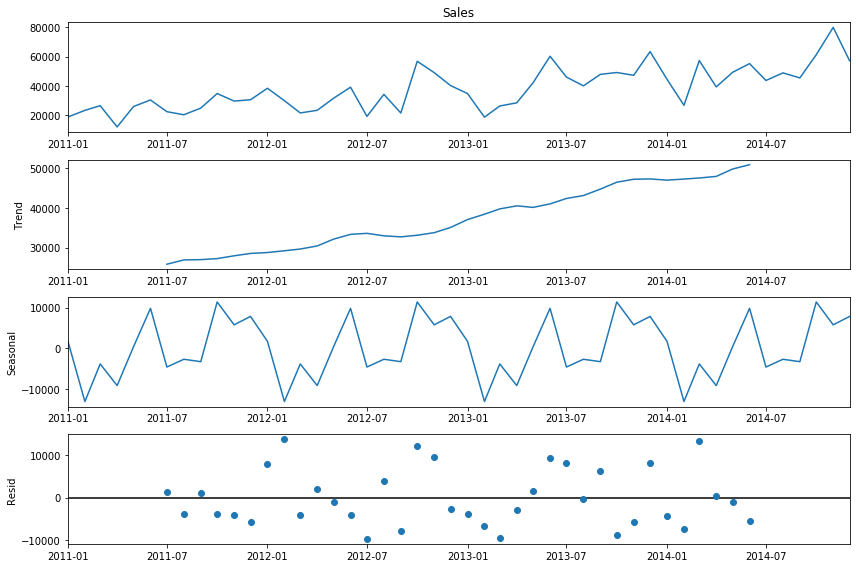

In [63]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

Multiplicative seasonal decomposition

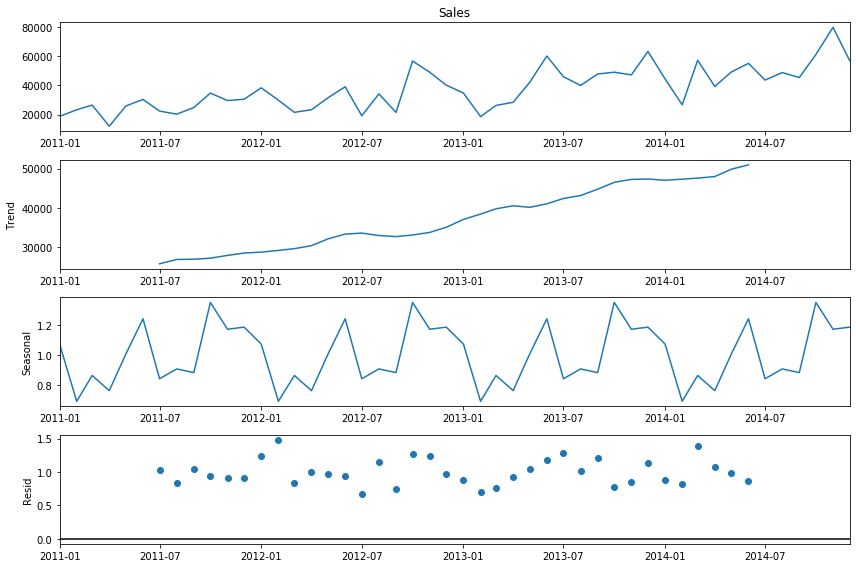

In [64]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Simple time series methods

Hypothesis : In exponential smoothening method the Holt-Winters’ exponential smoothing technique and in ARIMA method ARIMAX method is predicted to be the best method

# Exponential smoothing methods

# simple exponential smoothening method

In [65]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

Plot train, test and forecast

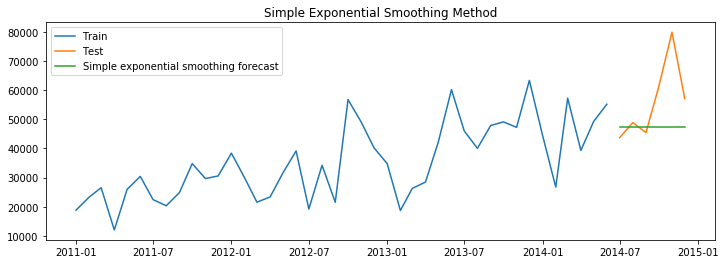

In [66]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

# Calculate RMSE and MAPE

In [67]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99


# Holt's method with trend

In [68]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


# Plot train, test and forecast

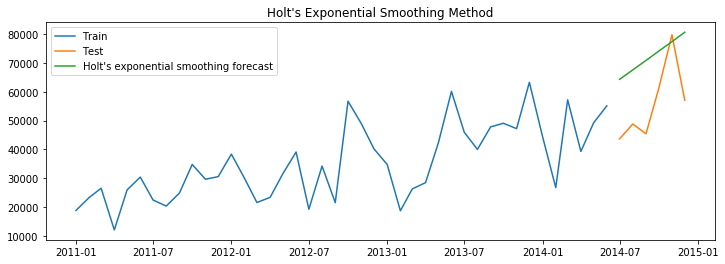

In [69]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

# Calculate RSME and MAPE

In [70]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57


# Holt Winters' additive method with trend and seasonality

In [71]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods= 12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0020374886703564874, 'smoothing_slope': 0.0020374868438797038, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29676.666994239353, 'initial_slope': 723.317636007915, 'initial_seasons': array([ -9378.87329099, -19734.27615341, -12187.76564172, -19978.47396353,
        -9315.9790386 ,  -1060.75172544, -14280.27499763, -12958.46182918,
       -13443.04599114,    963.6376487 ,  -4636.67766042,  -2722.90140336]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


# Plot train, test and forecast

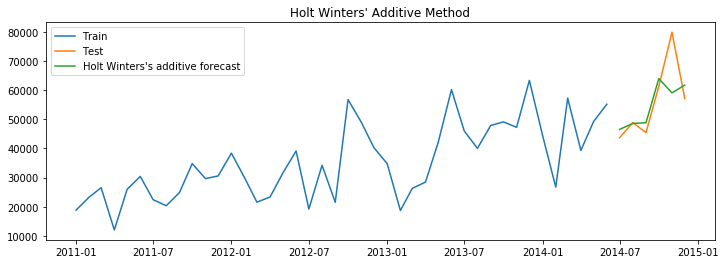

In [72]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

# Calculate RMSE and MAPE

In [73]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84


# Holt Winter's multiplicative method with trend and seasonality

In [74]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 9.693028733848621e-09, 'smoothing_slope': 9.123559401830165e-09, 'smoothing_seasonal': 2.9299671943913878e-08, 'damping_slope': nan, 'initial_level': 34110.96530161187, 'initial_slope': 730.4170382646302, 'initial_seasons': array([0.71585886, 0.4862027 , 0.68202326, 0.53148784, 0.73796969,
       0.90144356, 0.6247045 , 0.6570469 , 0.64896112, 0.93178148,
       0.82775312, 0.88438021]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


# Plot train, test and forecast

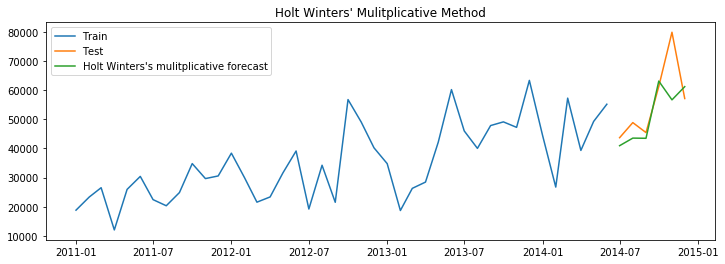

In [75]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

# Calculate RMSE and MAPE

In [76]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12


# Holt Winters additive method is the one with least MAPE value in smoothening technique

# Auto Regressive methods

# Stationarity vs non-stationary time series

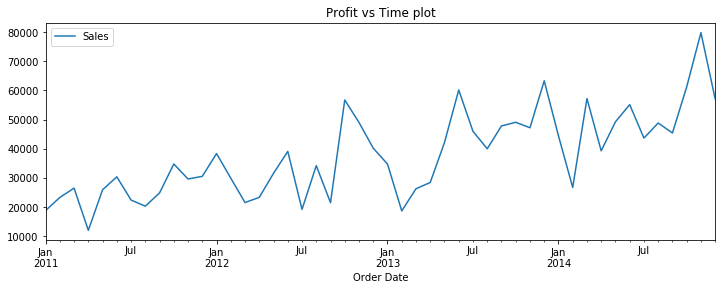

In [77]:
data1['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Profit vs Time plot')
plt.show(block=False)

# Augmented Dickey-Fuller (ADF) test

In [78]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


# Box Cox transformation to make variance constant

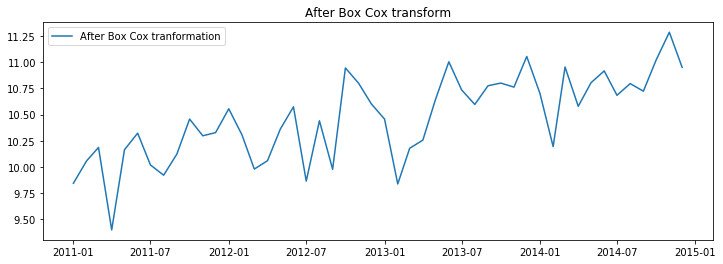

In [79]:
from scipy.stats import boxcox
data1_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data1_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

# Differencing to remove trend

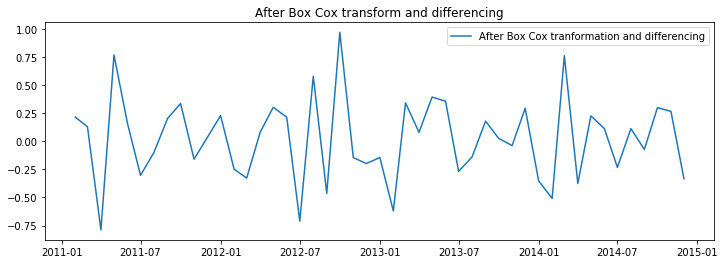

In [80]:
data_boxcox_diff = pd.Series(data1_boxcox - data1_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [81]:
data_boxcox_diff.dropna(inplace=True)

In [82]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

# Augmented Dickey-Fuller (ADF) test

In [83]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [84]:
train_data_boxcox = data1_boxcox[:train_len]
test_data_boxcox = data1_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [85]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
Freq: MS, dtype: float64

# Auto regression method (AR)

In [86]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


# Recover original time series

In [87]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data1_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

# Plot train, test and forecast

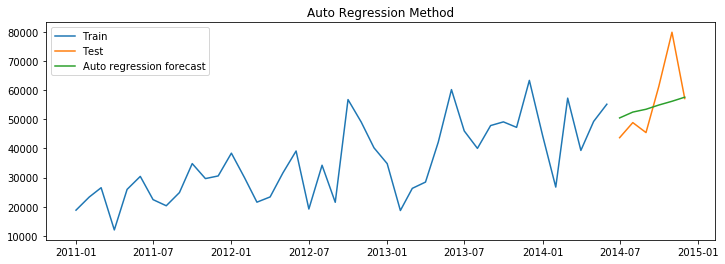

In [88]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

# Calculate RMSE and MAPE

In [89]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56


# Moving average method (MA)

In [90]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


# Recover original time series

In [91]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data1_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

# Plot train, test and forecast

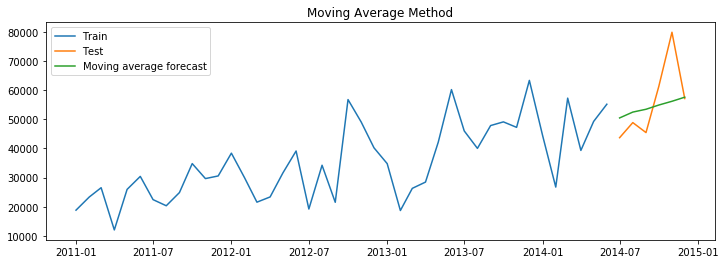

In [92]:
plt.figure(figsize=(12,4))
plt.plot(data1['Sales'][:train_len], label='Train')
plt.plot(data1['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

# Calculate RMSE and MAPE

In [93]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,10985.28,13.56


# Auto regression moving average method (ARMA)

In [94]:
model = ARIMA(train_data_boxcox_diff, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


# Recover original time series

In [95]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data1_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

# Plot train, test and forecast

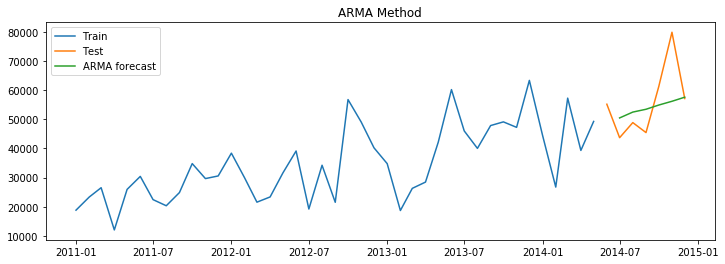

In [96]:
plt.figure(figsize=(12,4))
plt.plot( data1['Sales'][:train_len-1], label='Train')
plt.plot(data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

# Calculate RMSE and MAPE

In [97]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,10985.28,13.56
0,Autoregressive moving average (ARMA) method,10985.28,13.56


# Auto regressive integrated moving average (ARIMA)

In [98]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


# Recover original time series forecast

In [101]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data1_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

# Plot train, test and forecast

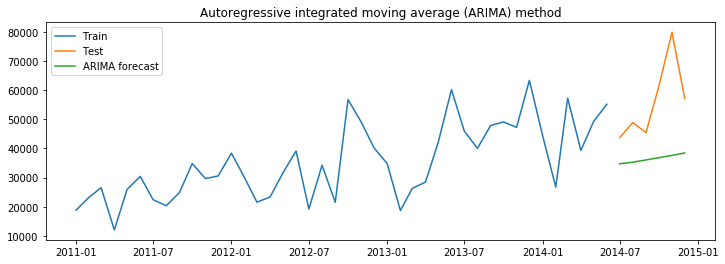

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

# Calculate RMSE and MAPE

In [105]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,10985.28,13.56
0,Autoregressive moving average (ARMA) method,10985.28,13.56
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40


# Seasonal auto regressive integrated moving average (SARIMA)

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041758
ma.L1      -0.997142
ar.S.L12    0.099964
ma.S.L12   -0.972619
sigma2      0.058191
dtype: float64


# Recover original time series forecast

In [107]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

# Plot train, test and forecast

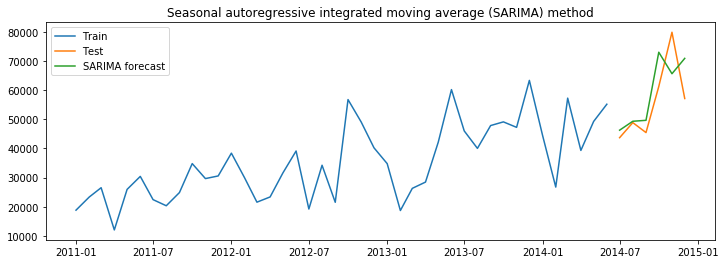

In [108]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

# Calculate RMSE and MAPE

In [109]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast,15011.49,15.99
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,10985.28,13.56
0,Autoregressive moving average (ARMA) method,10985.28,13.56
0,Autoregressive integrated moving average (ARIM...,22654.32,32.40
0,Seasonal autoregressive integrated moving aver...,9617.20,12.88


# SARIMA method is having least MAPE in ARIMA set of forecasting method